## Testing for watermark removal at targeted area 
- use inpaint method from cv2 for testing only

In [47]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.2.jpg'
img = cv2.imread(img_path)

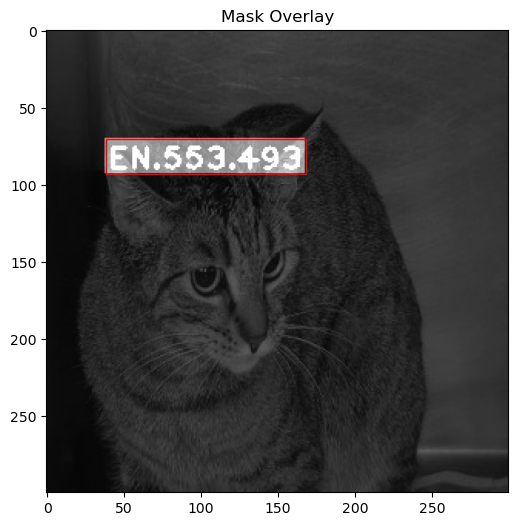

In [59]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.2.jpg'
img = cv2.imread(img_path)

mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = 255

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img_rgb)


ax.imshow(mask, cmap='gray', alpha=0.5) # transparent

rect = patches.Rectangle((start_ir[0], start_ir[1]), end_ir[0] - start_ir[0], end_ir[1] - start_ir[1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_title('Mask Overlay')

plt.show()

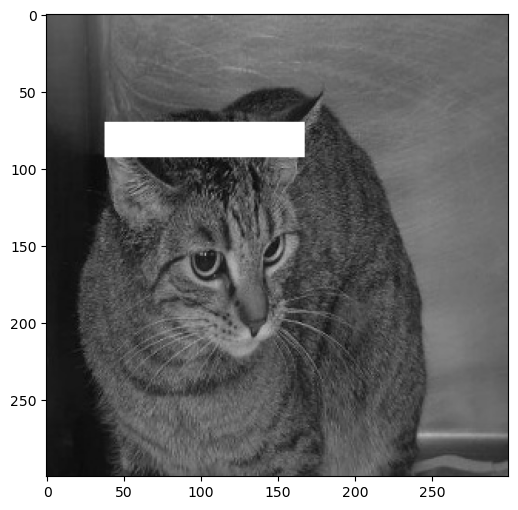

In [68]:
img[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = [255, 255, 255] # Modify it to white
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img_rgb)

In [69]:
save_path = '/Users/xinmingshen_1/Desktop/Watermark/modified_image_test.jpg'
cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

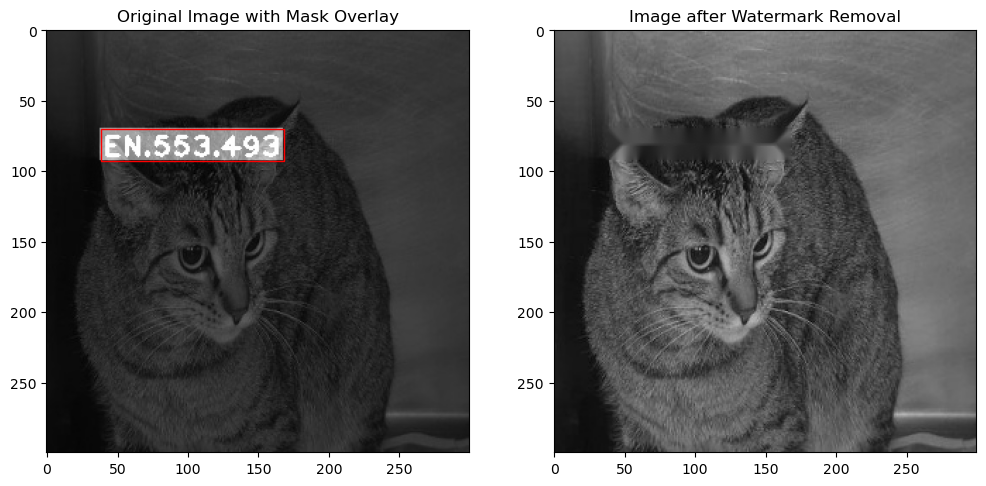

In [67]:
inpaint_technique = cv2.INPAINT_TELEA  # or use cv2.INPAINT_NS
inpainted_image = cv2.inpaint(img, mask, 3, inpaint_technique)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_rgb)
axs[0].imshow(mask, cmap='gray', alpha=0.5)
rect = patches.Rectangle((start_ir[0], start_ir[1]), end_ir[0] - start_ir[0], end_ir[1] - start_ir[1], linewidth=1, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)
axs[0].set_title('Mask Overlay')

# Inpainted image
axs[1].imshow(inpainted_image_rgb)
axs[1].set_title('Image after Watermark Removal')

plt.show()

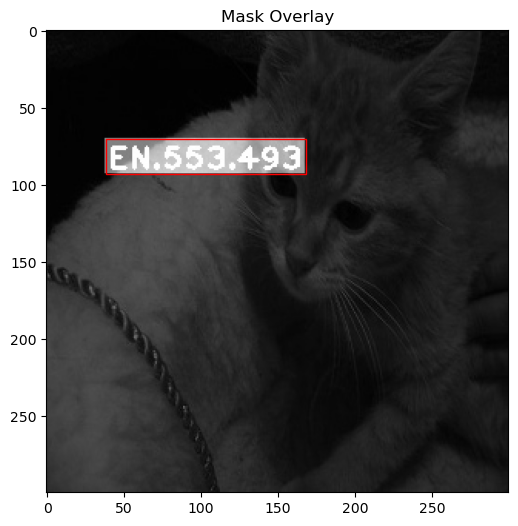

True

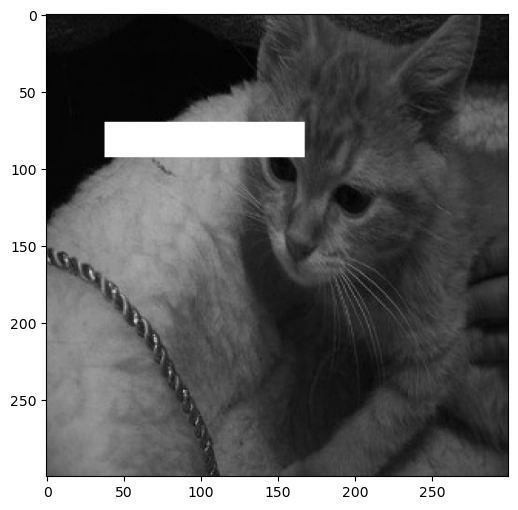

In [72]:
# I should really write a function for this :o
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.3.jpg'
img = cv2.imread(img_path)

mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = 255

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.imshow(img_rgb)
# ax.imshow(mask, cmap='gray', alpha=0.5) # transparent

rect = patches.Rectangle((start_ir[0], start_ir[1]), end_ir[0] - start_ir[0], end_ir[1] - start_ir[1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_title('Mask Overlay')
plt.show()


img[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = [255, 255, 255] # Modify it to white
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.imshow(img_rgb)

save_path = '/Users/xinmingshen_1/Desktop/Watermark/modified_image_test.jpg'
cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [74]:
def remove_watermark_and_save_seriously(img_path, save_dir, start_ir, end_ir):
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Skipping {img_path}, could not load image.")
        return

    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    mask[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = 255

    img[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = [255, 255, 255]

    filename = os.path.basename(img_path) # if I know this function earlier... so much faster
    save_path = os.path.join(save_dir, filename)

    cv2.imwrite(save_path, img)
    print(f"Processed and saved: {save_path}")

In [76]:
img_dir = '/Users/xinmingshen_1/Desktop/test 2'
save_dir = '/Users/xinmingshen_1/Desktop/Watermark'

start_ir = (38, 70)  
end_ir = (168, 93)  

for filename in os.listdir(img_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):  
        img_path = os.path.join(img_dir, filename)
        remove_watermark_and_save_seriously(img_path, save_dir, start_ir, end_ir)

Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.6.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.30.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.24.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.18.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.19.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.25.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.31.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.7.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.5.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.27.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.33.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.32.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.26.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.4.jpg
Processed 

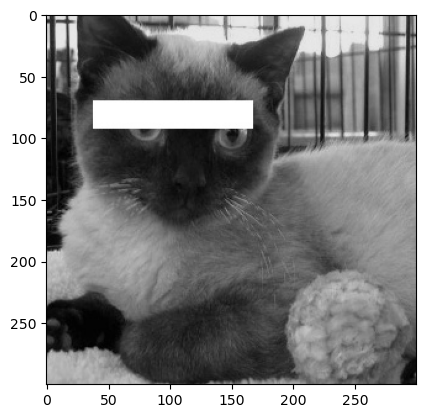

In [1]:
## Now using the Shah method
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg


img = cv2.imread('/Users/xinmingshen_1/Desktop/Watermark/cat.1.jpg')
plt.imshow(img)
plt.show()

In [2]:
import scipy
from scipy.linalg import toeplitz
from scipy.sparse import spdiags
from scipy.sparse import linalg

In [11]:
def grad_ij(N, h, direction, boundary):
    if direction == 'forward':
        main_diag = -np.ones(N)
        off_diag = np.ones(N-1)
        data = np.array([main_diag, off_diag])
        diags = np.array([0, 1])
    elif direction == 'backward':
        main_diag = np.ones(N)
        off_diag = -np.ones(N-1)
        data = np.array([off_diag, main_diag])
        diags = np.array([-1, 0])
    else:  # central
        main_diag = np.zeros(N)
        off_diag = np.ones(N-1)
        data = np.array([-off_diag, off_diag])
        diags = np.array([-1, 1])
        h *= 2

    D = spdiags(data, diags, N, N) / h

    if boundary == 'periodic':
        if direction in ['forward', 'backward']:
            D[0, -1] = 1 if direction == 'forward' else -1
            D[-1, 0] = -1 if direction == 'forward' else 1
    return D

In [12]:
def laplacian_ij(N, h):
    main_diag = -2 * np.ones(N)
    off_diag = np.ones(N-1)
    D2 = spdiags([off_diag, main_diag, off_diag], [-1, 0, 1], N, N) / (h**2)
    D2[0, -1] = D2[-1, 0] = 1 / (h**2)
    return D2

In [13]:
def mumford_shah(inpainted_img, mask, fidelity, alpha, gamma, epsilon, maxiter=100, tol=1e-5):
    N = inpainted_img.size
    h = 1 

    D = grad_ij(N, h, 'forward', 'periodic')
    L = laplacian_ij(N, h)

    M = scipy.sparse.eye(N) + (2*epsilon*gamma/alpha) * L - 4*(epsilon**2)*L
    chi = mask.copy()

    for _ in range(maxiter):
        # Solve for chi
        chi_new = spsolve(M, mask)
        if np.linalg.norm(chi_new - chi) < tol:
            chi = chi_new
            break
        chi = chi_new

    # Solve for inpainted image u
    A = scipy.sparse.eye(N) + D.T.dot(D)
    u = spsolve(A, fidelity * inpainted_img)

    return u.reshape(inpainted_img.shape)

In [14]:
# Read the image
img_path = '/Users/xinmingshen_1/Desktop/Watermark/cat.1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed for consistency

# Define the mask region
start_ir = (38, 70)  
end_ir = (168, 93)

# Create the mask
mask = np.ones(img.shape[:2], dtype=np.float64) 
mask[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = 0  
mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)  

In [15]:
maxiter = 10 
tol = 1e-5      
fidelity = 1.0
alpha = 1000 
gamma = 0.1 
epsilon = 0.01 

In [13]:
restored_image = mumford_shah(img, mask, maxiter, tol, fidelity, alpha, gamma, epsilon)

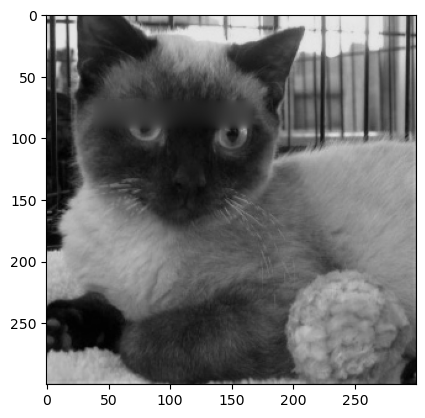

In [14]:
plt.imshow(restored_image, cmap='gray') 
plt.show()

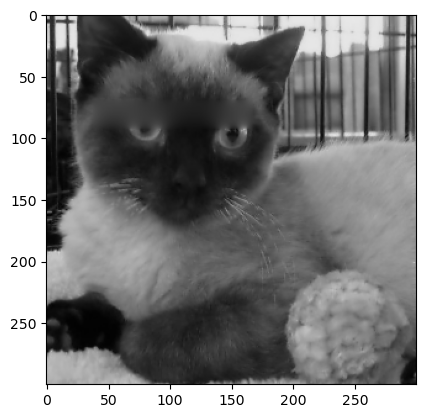

In [60]:
restored_image = mumford_shah(img, mask, maxiter, tol, 2.0, 1, 2, epsilon)
plt.imshow(restored_image, cmap='gray') 
plt.show()

## Testing texual mask: 

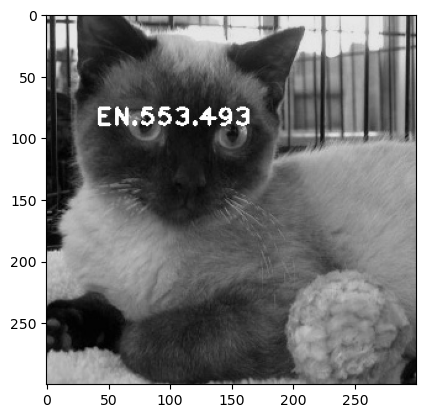

Image shape: (300, 300, 3)
Mask shape: (300, 300, 3)


In [18]:
## Testing if the watermark removed is only text based
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.1.jpg'
imgnew = cv2.imread(img_path)
imgnew = cv2.cvtColor(imgnew, cv2.COLOR_BGR2RGB)
plt.imshow(imgnew)
plt.show()

threshold = 250 # Assumption: watermark area is purely white
masknew = np.all(imgnew >= threshold, axis=-1)

masknew = 1 - masknew.astype(np.float64)
masknew_3d = np.repeat(masknew[:, :, np.newaxis], 3, axis=2)

print("Image shape:", imgnew.shape)
print("Mask shape:", masknew_3d.shape)
# Image shape: (300, 300, 3)
# Mask shape: (300, 300)

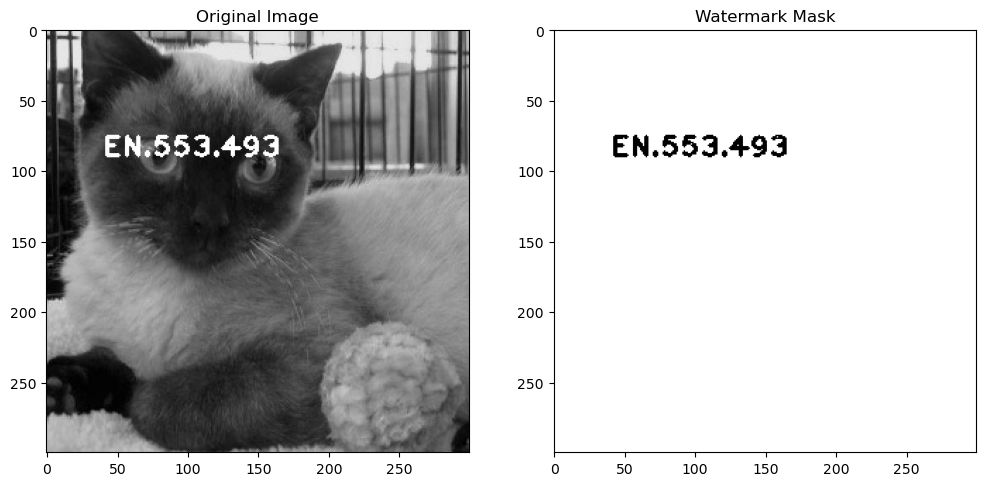

In [19]:
# Show the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgnew)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(masknew, cmap='gray')
plt.title('Watermark Mask')
plt.show()

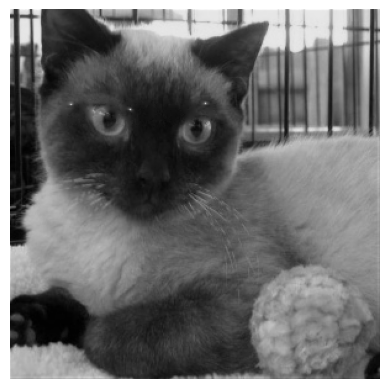

In [20]:
restored_imagenew = mumford_shah(imgnew, masknew_3d, maxiter, tol, fidelity, alpha, gamma, epsilon)

plt.imshow(restored_imagenew)
plt.axis('off') 
plt.show()

In [21]:
masknew = np.all(imgnew >= threshold, axis=-1)
masknew = masknew.astype(np.uint8) # Convertion problem
opencv_mask = 255 * (1 - masknew)  # Inverting mask...

In [22]:
# Apply OpenCV inpainting
inpaint_radius = 10 

restored_telea = cv2.inpaint(restored_imagenew, masknew, inpaint_radius, cv2.INPAINT_TELEA)
restored_ns = cv2.inpaint(restored_imagenew, masknew, inpaint_radius, cv2.INPAINT_NS)


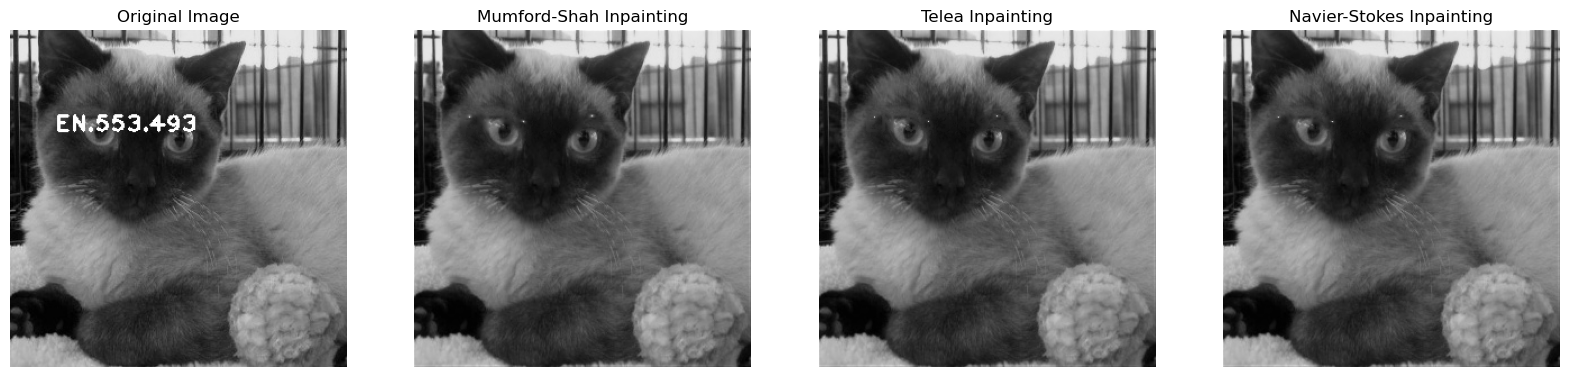

In [23]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(imgnew)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(restored_imagenew)
plt.title('Mumford-Shah Inpainting')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(restored_telea)
plt.title('Telea Inpainting')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(restored_ns)
plt.title('Navier-Stokes Inpainting')
plt.axis('off')

plt.show()

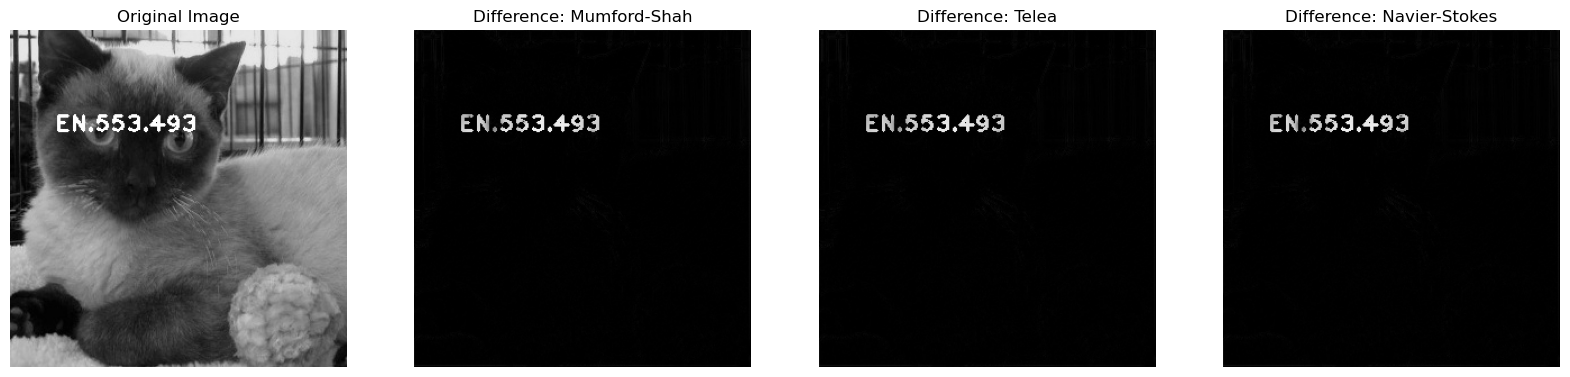

In [24]:
# Calculate difference images
diff_mumford_shah = cv2.absdiff(imgnew, restored_imagenew)
diff_telea = cv2.absdiff(imgnew, restored_telea)
diff_ns = cv2.absdiff(imgnew, restored_ns)

plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(imgnew)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(diff_mumford_shah)
plt.title('Difference: Mumford-Shah')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(diff_telea)
plt.title('Difference: Telea')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(diff_ns)
plt.title('Difference: Navier-Stokes')
plt.axis('off')

plt.show()

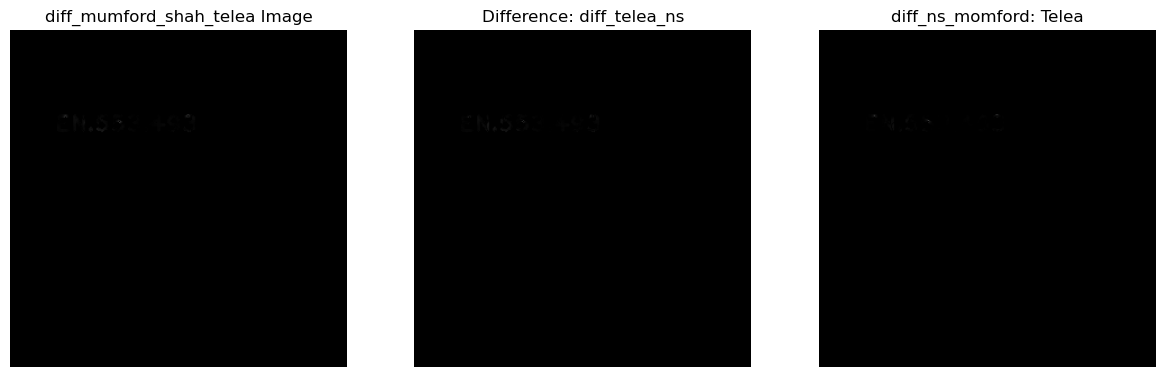

In [25]:
# Calculate difference images
diff_mumford_shah_telea = cv2.absdiff(restored_telea, restored_imagenew)
diff_telea_ns = cv2.absdiff(restored_ns, restored_telea)
diff_ns_momford = cv2.absdiff(restored_imagenew, restored_ns)

plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(diff_mumford_shah_telea)
plt.title('diff_mumford_shah_telea Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(diff_telea_ns)
plt.title('Difference: diff_telea_ns')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(diff_ns_momford)
plt.title('diff_ns_momford: Telea')
plt.axis('off')


plt.show()

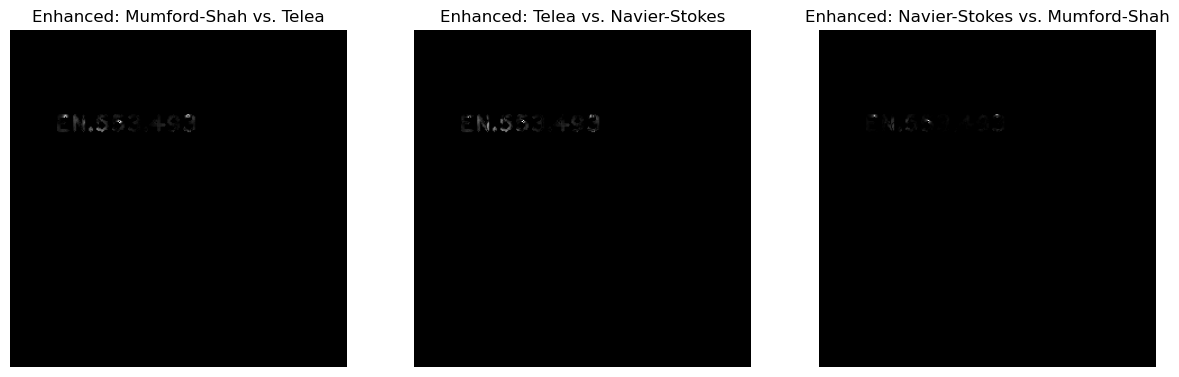

In [26]:
def contrast_stretch(image):
    img_float = image.astype(np.float32)
    img_stretched = cv2.normalize(img_float, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX) # wow equalization
    return img_stretched.astype(np.uint8)

# Applying contrast stretching to the difference images
diff_mumford_shah_telea_stretched = contrast_stretch(diff_mumford_shah_telea)
diff_telea_ns_stretched = contrast_stretch(diff_telea_ns)
diff_ns_mumford_stretched = contrast_stretch(diff_ns_momford)

plt.figure()
plt.subplot(1, 4, 1)
plt.imshow(diff_mumford_shah_telea_stretched, cmap='gray')
plt.title('Enhanced: Mumford-Shah vs. Telea')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(diff_telea_ns_stretched, cmap='gray')
plt.title('Enhanced: Telea vs. Navier-Stokes')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(diff_ns_mumford_stretched, cmap='gray')
plt.title('Enhanced: Navier-Stokes vs. Mumford-Shah')
plt.axis('off')

plt.show()


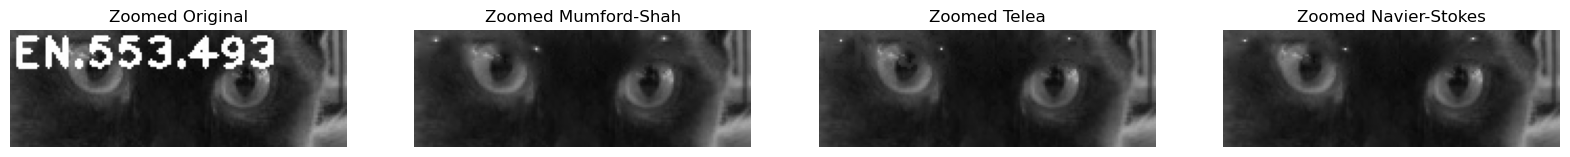

In [27]:
zoom_window = [72, 128, 39, 200]

plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(imgnew[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(restored_imagenew[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed Mumford-Shah')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(restored_telea[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed Telea')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(restored_ns[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed Navier-Stokes')
plt.axis('off')

plt.show()

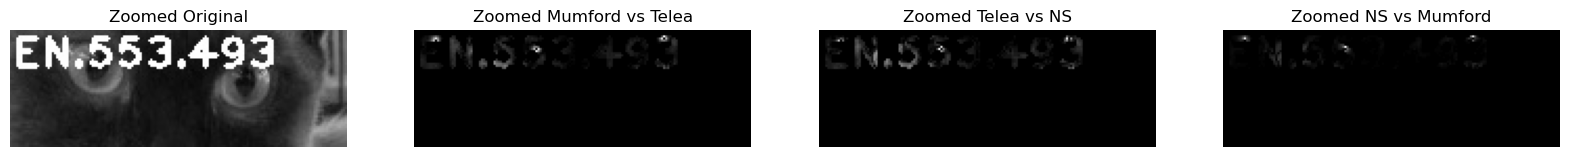

In [31]:
zoom_window = [72, 128, 39, 200]

plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(imgnew[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(diff_mumford_shah_telea_stretched[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed Mumford vs Telea')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(diff_telea_ns_stretched[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed Telea vs NS')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(diff_ns_mumford_stretched[zoom_window[0]:zoom_window[1], zoom_window[2]:zoom_window[3]])
plt.title('Zoomed NS vs Mumford')
plt.axis('off')

plt.show()


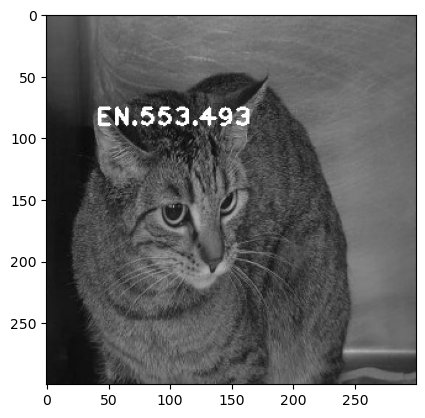

Image shape: (300, 300, 3)
Mask shape: (300, 300, 3)


In [32]:
## Testing if the watermark removed is only text based
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.2.jpg'
imgnew = cv2.imread(img_path)
imgnew = cv2.cvtColor(imgnew, cv2.COLOR_BGR2RGB)
plt.imshow(imgnew)
plt.show()

threshold = 250 # Assumption: watermark area is purely white
masknew = np.all(imgnew >= threshold, axis=-1)

masknew = 1 - masknew.astype(np.float64)
masknew_3d = np.repeat(masknew[:, :, np.newaxis], 3, axis=2)

print("Image shape:", imgnew.shape)
print("Mask shape:", masknew_3d.shape)
# Image shape: (300, 300, 3)
# Mask shape: (300, 300)

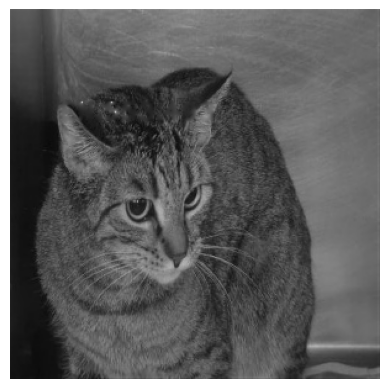

In [33]:
restored_imagenew = mumford_shah(imgnew, masknew_3d, maxiter, tol, fidelity, alpha, gamma, epsilon)

plt.imshow(restored_imagenew)
plt.axis('off')  
plt.show()